In [2]:
import pandas as pd
import numpy as n

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [99]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import utils
from sklearn import svm


In [102]:

data = pd.read_csv(r"resources\data.csv")
riasec_perc = pd.read_csv(r"resources\riasec\riasec_perc.csv",index_col=0)
ocean_perc = pd.read_csv(r"resources\ocean\ocean_perc.csv",index_col=0)



train_ocean = ocean_perc[:102078] #2000
train_riasec = riasec_perc[:102078]
train_data = data[:102078]
# test_ocean = ocean_perc[102078:116,660] # Incorrect way of range 
# test_riasec = riasec_perc[102078:116,660]


test_ocean_1 = ocean_perc[116660:] # 145790
test_riasec_1 = riasec_perc[116660:]
test_data_1 = data[116660:]


c:\users\bilal\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (93) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
R_x = pd.concat([train_riasec['Realistic'].to_frame(), train_data['gender'].to_frame()],axis=1)

In [ ]:
O_y = n.squeeze(train_ocean['Openness'])

regr = linear_model.LogisticRegression()
regr.fit(R_x, O_y)
R_test = test_riasec_1[['Realistic']]

O_pred = regr.predict(pd.concat([test_riasec_1['Realistic'].to_frame(), test_data_1['gender'].to_frame()],axis=1))
print(O_pred)

R2 = r2_score(test_ocean_1['Openness'],O_pred)
print(R2)

In [61]:
print(test_riasec_1['Realistic'].to_numpy())

[30.  30.  30.  ... 20.  72.5 52.5]


In [103]:
RS_x = train_riasec[['Realistic','Social']]
O_y = n.squeeze(train_ocean['Openness'])

In [ ]:
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(RS_x, O_y)
    print(clf.predict(test_riasec_1[['Realistic','Social']]),'\n')
    R2 = r2_score(test_ocean_1['Openness'],clf.predict(test_riasec_1[['Realistic','Social']]))
    print(R2)


SVR()


In [85]:

regr = LogisticRegression()
regr.fit(RS_x, O_y)
O_pred = regr.predict(test_riasec_1[['Realistic','Social']])

R2 = r2_score(test_ocean_1['Openness'],O_pred)
print(R2)

0.024935576993327824


In [86]:
test_ocean_1['Openness']

145790     92.857143
145791     92.857143
145792     28.571429
145793     57.142857
145794     92.857143
145795     50.000000
145796     71.428571
145797     92.857143
145798     92.857143
145799     85.714286
145800     78.571429
145801     71.428571
145802     92.857143
145803     57.142857
145804     92.857143
145805     92.857143
145806     85.714286
145807     57.142857
145808     71.428571
145809    100.000000
145810     85.714286
145811     78.571429
145812     78.571429
145813     85.714286
145814     57.142857
145815     92.857143
145816     71.428571
145817     78.571429
145818    100.000000
145819     92.857143
145820     92.857143
145821    100.000000
145822     64.285714
145823     78.571429
145824    100.000000
145825     78.571429
145826     71.428571
145827    100.000000
Name: Openness, dtype: float64

In [87]:
O_pred

array([75.821634  , 76.56239846, 77.81534763, 75.35431735, 82.67814355,
       78.79484899, 72.48523506, 77.17871588, 75.7564516 , 79.93350829,
       78.83971706, 81.47006244, 81.39048347, 79.14787577, 80.21711327,
       80.01308726, 74.6482638 , 79.38661268, 78.60098015, 79.46619165,
       77.54189982, 74.48910586, 75.26458122, 72.88312991, 74.85652921,
       77.39289905, 79.30703371, 81.23132553, 79.0682968 , 78.37240041,
       81.81293205, 80.24166701, 73.27086759, 79.07845397, 81.47006244,
       82.06182612, 79.68461422, 78.90913886])

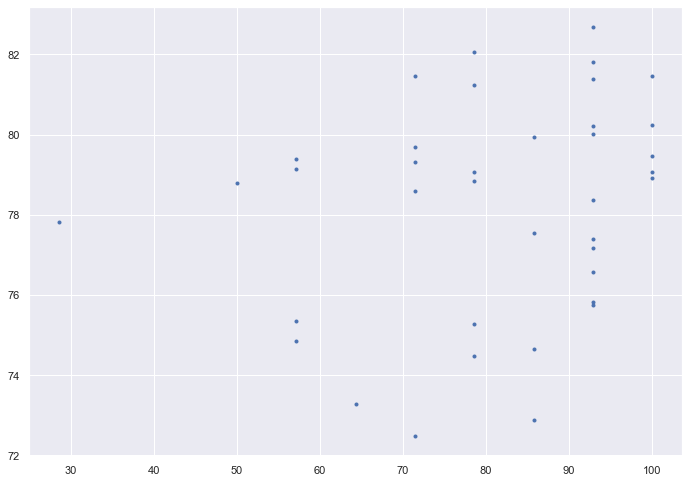

In [88]:
plt.plot(test_ocean_1['Openness'],O_pred, '.')